# Random Forest Classifier

## Get dataset

In [1]:
from finlab.ml import fundamental_features
dataset = fundamental_features()
dataset = dataset.dropna(thresh=int(len(dataset)*0.5), axis=1).dropna(how='any')

## Add labels

In [2]:
features = dataset.columns

import finlab.ml as ml

ml.add_profit_prediction(dataset)
dataset = dataset.dropna()
dataset.head()

R101_ROA稅後息前  R11V_ROA綜合損益  R103_ROE稅後  R11U_ROE綜合損益  \
stock_id date                                                               
1101     2014-05-15  2.791232e+06      1.630076    1.789978      2.971092   
         2014-08-14  8.379538e+06      0.152556    5.481276      0.282596   
         2014-11-14  1.477153e+07      2.168353    9.817990      4.058708   
         2015-03-31  1.996292e+07      3.002608   12.657647      5.476992   
         2015-05-15  9.745154e+05      0.069454    0.601114      0.124782   

                     R145_稅前息前折舊前淨利率  R105_營業毛利率  R106_營業利益率  R107_稅前淨利率  \
stock_id date                                                              
1101     2014-05-15        21.368815   18.206665   13.790211   13.290971   
         2014-08-14        42.801859   22.404973   18.630915   30.862803   
         2014-11-14        71.162010   22.175860   18.422237   52.943977   
         2015-03-31        95.660637   20.894608   15.825841   71.517830   
         2015-05-15        17.520262   13.344165    7.898772    6.855678   

                     R108_稅後淨利率  R112_業外收支營收率  ...   R501_流動比率   R502_速動比率  \
stock_id date                                  ...                           
1101     2014-05-15   10.447714     -0.499240  ...  123.837828  109.510229   
         2014-08-14   15.149579      1.091441  ...  109.819505   97.360139   
         2014-11-14   16.396389      1.835055  ...  113.370853  100.450140   
         2015-03-31   13.594134      1.937474  ...  140.759054  125.502509   
         2015-05-15    4.545296     -1.043095  ...  132.899231  118.561600   

                     R503_利息支出率   R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  \
stock_id date                                                           
1101     2014-05-15   -9.792979  17732671.0      0.023981    0.550675   
         2014-08-14   55.169680   7972516.0      0.028432    0.622629   
         2014-11-14    6.631518  10552354.0      0.026593    0.581786   
         2015-03-31    3.898742  27973772.0      0.025961    0.565798   
         2015-05-15   -7.153186  22891238.0      0.018713    0.455819   

                     R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量    return  
stock_id date                                                           
1101     2014-05-15    -81394854.0     0.044805    3869612.0  1.073347  
         2014-08-14    -74379365.0     0.052721   -3002140.0  0.984816  
         2014-11-14    -76877637.0     0.049112   10205052.0  0.969163  
         2015-03-31    -78804395.0     0.047718   24426590.0  0.956818  
         2015-05-15    -89211708.0     0.034296   -3122357.0  0.850077  

[5 rows x 42 columns]

## Split Train Test dataset

In [3]:
select = dataset.index.get_level_values('date') < '2017'
dataset_train = dataset[select]
dataset_test = dataset[~select]

## Training

In [4]:
from sklearn.ensemble import RandomForestClassifier

cf = RandomForestClassifier(200)
cf.fit(dataset_train[features], dataset_train['return'] > 1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Prediction

In [5]:
import pandas as pd
prediction = cf.predict(dataset_test[features])

## Backtest

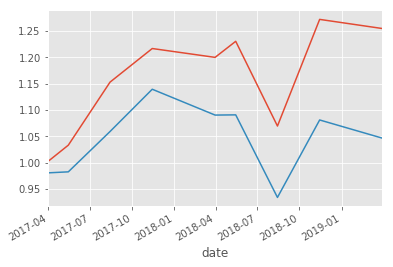

In [7]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

returns1 = dataset_test['return'][prediction == True]
dates = returns1.index.get_level_values('date')
returns1.groupby(dates).mean().cumprod().plot()

returns2 = dataset_test['return'][prediction == False]
dates = returns2.index.get_level_values('date')
returns2.groupby(dates).mean().cumprod().plot()

## Feature Importance

In [8]:
importance = pd.Series(cf.feature_importances_, index=features).sort_values(ascending=False)
importance

R69B_自由現金流量        0.031940
R409_淨值成長率         0.030850
R408_資產總額成長率       0.029863
R401_營收成長率         0.027247
R405_稅後淨利成長率       0.026611
R179_貝里比率          0.026353
R203_研究發展費用率       0.026330
R145_稅前息前折舊前淨利率    0.026224
R403_營業利益成長率       0.026180
R112_業外收支營收率       0.026125
R503_利息支出率         0.025669
R402_營業毛利成長率       0.025502
R303_每股現金流量        0.025379
R610_存貨週轉率         0.025294
R11U_ROE綜合損益       0.025241
R108_稅後淨利率         0.025227
R106_營業利益率         0.025101
R11V_ROA綜合損益       0.024851
R305_每股營業利益        0.024796
R406_經常利益成長率       0.024677
R205_現金流量比率        0.024674
R103_ROE稅後         0.024609
R107_稅前淨利率         0.024006
R404_稅前淨利成長率       0.023951
R316_每股稅後淨利        0.023766
R678_營運資金          0.023743
R612_固定資產週轉次數      0.023484
R314_每股綜合損益        0.023474
R607_總資產週轉次數       0.023246
R105_營業毛利率         0.023153
R207_稅率            0.023024
R101_ROA稅後息前       0.022374
R502_速動比率          0.022239
R501_流動比率          0.022113
R613_淨值週轉率次        0.021668
R306_每股稅前淨利        0

## New Strategy using feature importance

In [12]:
from finlab.data import Data
data = Data()
close = data.get('收盤價')
sma = close.rolling(60, min_periods=10).mean()
bias = close / sma

ml.add_feature(dataset, 'bias', bias)
dataset.head()

R101_ROA稅後息前  R11V_ROA綜合損益  R103_ROE稅後  R11U_ROE綜合損益  \
stock_id date                                                               
1101     2014-05-15  2.791232e+06      1.630076    1.789978      2.971092   
         2014-08-14  8.379538e+06      0.152556    5.481276      0.282596   
         2014-11-14  1.477153e+07      2.168353    9.817990      4.058708   
         2015-03-31  1.996292e+07      3.002608   12.657647      5.476992   
         2015-05-15  9.745154e+05      0.069454    0.601114      0.124782   

                     R145_稅前息前折舊前淨利率  R105_營業毛利率  R106_營業利益率  R107_稅前淨利率  \
stock_id date                                                              
1101     2014-05-15        21.368815   18.206665   13.790211   13.290971   
         2014-08-14        42.801859   22.404973   18.630915   30.862803   
         2014-11-14        71.162010   22.175860   18.422237   52.943977   
         2015-03-31        95.660637   20.894608   15.825841   71.517830   
         2015-05-15        17.520262   13.344165    7.898772    6.855678   

                     R108_稅後淨利率  R112_業外收支營收率  ...   R502_速動比率  R503_利息支出率  \
stock_id date                                  ...                           
1101     2014-05-15   10.447714     -0.499240  ...  109.510229   -9.792979   
         2014-08-14   15.149579      1.091441  ...   97.360139   55.169680   
         2014-11-14   16.396389      1.835055  ...  100.450140    6.631518   
         2015-03-31   13.594134      1.937474  ...  125.502509    3.898742   
         2015-05-15    4.545296     -1.043095  ...  118.561600   -7.153186   

                      R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  R612_固定資產週轉次數  \
stock_id date                                                              
1101     2014-05-15  17732671.0      0.023981    0.550675    -81394854.0   
         2014-08-14   7972516.0      0.028432    0.622629    -74379365.0   
         2014-11-14  10552354.0      0.026593    0.581786    -76877637.0   
         2015-03-31  27973772.0      0.025961    0.565798    -78804395.0   
         2015-05-15  22891238.0      0.018713    0.455819    -89211708.0   

                     R613_淨值週轉率次  R69B_自由現金流量    return      bias  
stock_id date                                                      
1101     2014-05-15     0.044805    3869612.0  1.073347  0.960967  
         2014-08-14     0.052721   -3002140.0  0.984816  1.021982  
         2014-11-14     0.049112   10205052.0  0.969163  0.971380  
         2015-03-31     0.047718   24426590.0  0.956818  1.040769  
         2015-05-15     0.034296   -3122357.0  0.850077  0.988372  

[5 rows x 43 columns]

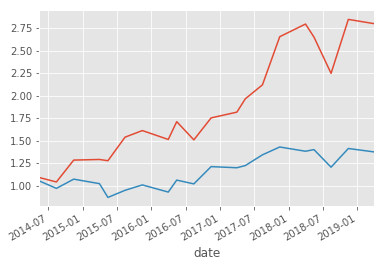

In [13]:
items = list(importance.index[:20])

def select(df):
    rank = df[items].rank(pct=True).sum(axis=1)
    return df[rank > rank.quantile(0.9)]['return'][df['bias'] > 1].mean()

dates = dataset.index.get_level_values('date')
dataset.groupby(dates).apply(select).cumprod().plot()
dataset['return'].groupby(dates).mean().cumprod().plot()